In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining functions

In [2]:
def plot_decision_surface(y,X,W):
    resolution=0.02
    markers = ('s', 'x', 'o', '^', 'v')
    # plot the decision surface
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    
    Xg = np.array([xx1.ravel(), xx2.ravel()]).T
    xg0 = np.ones((Xg.shape[0],1))
    Xg = np.hstack((xg0,Xg))
    Z = yHat_(Xg,W)
    Z = Z.reshape(xx1.shape)
    
    # plot area
    plt.contourf(xx1, xx2, Z, alpha=0.4,cmap='Set3')
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        px = X[y == cl, 1]
        py = X[y == cl, 2]
        plt.scatter(px, py, 
                    alpha=0.8, cmap='Pastel1',
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    # plt.savefig('./perceptron_2.png', dpi=300)
    plt.show()

In [3]:
def z_(X,W):
    n = W.shape[0]
    X = X.reshape(-1,n)
    return np.dot(X,W)

In [4]:
def phi_(X,W):
    z = z_(X,W)
    return np.where(z>=0,1,-1)

In [5]:
def yHat_(X,W):
    return phi_(X,W)

In [6]:
def sumErr_(y,X,W):
    yh = yHat_(X,W)
    err = np.abs(y-yh)
    return err.sum()

# Program start

In [7]:
# Model parameters
eta=0.1
n_iter=10

In [8]:
# Read data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)

In [9]:
# Extract y values and perform feature extraction
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [10]:
# Extract sepal length and petal length
X = df.iloc[0:100,[0,2]].values

In [11]:
# Append a columne of X0
x0 = np.ones((X.shape[0],1))
X = np.hstack((x0,X))

In [12]:
# Initialize weight and bias
W = np.zeros(3)

In [13]:
for n in range(n_iter):
    for i in range(y.shape[0]):
        yi = y[i]
        Xi = X[i,:]
        yHat = yHat_(Xi,W)
        dy = yi - yHat
        deltaW0 = eta * dy
        deltaW = eta * dy * Xi[1:]
        W[0] = W[0] + deltaW0
        W[1:] = W[1:] + deltaW
    sumErr = sumErr_(y,X,W)
    print('Epoch =',n, ', sumErr = ', sumErr,', W = ', W)

Epoch = 0 , sumErr =  100 , W =  [0.   0.38 0.66]
Epoch = 1 , sumErr =  100 , W =  [0.   0.76 1.32]
Epoch = 2 , sumErr =  100 , W =  [-0.2   0.22  1.68]
Epoch = 3 , sumErr =  100 , W =  [-0.2   0.34  2.1 ]
Epoch = 4 , sumErr =  0 , W =  [-0.4  -0.68  1.82]
Epoch = 5 , sumErr =  0 , W =  [-0.4  -0.68  1.82]
Epoch = 6 , sumErr =  0 , W =  [-0.4  -0.68  1.82]
Epoch = 7 , sumErr =  0 , W =  [-0.4  -0.68  1.82]
Epoch = 8 , sumErr =  0 , W =  [-0.4  -0.68  1.82]
Epoch = 9 , sumErr =  0 , W =  [-0.4  -0.68  1.82]


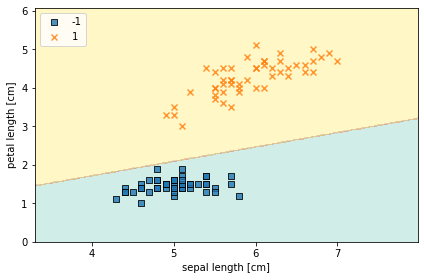

In [14]:
plot_decision_surface(y,X,W)